In [28]:
import pandas as pd
# from zipfile import ZipFile
import os
import re
# import json
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
# import wordcloud
# from sklearn.preprocessing import OneHotEncoder
# import matplotlib.animation as animation
import nltk
from nltk.corpus import wordnet
from ast import literal_eval
from IPython.display import Image, display
from myfunctions import *
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
sns.set()

[nltk_data] Downloading package wordnet to /Users/aditya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aditya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aditya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
sleep = pd.read_csv('All Data/Raw Journey Data/Sleep_data_Until16May2020.csv')
sleep.rename(columns={'Unnamed: 0':'id'}, inplace=True)
sleep.drop(columns='logId',inplace=True)
sleep.set_index('id', inplace=True)
sleep

,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep
id,,,,,,,,,,,,,,
19875992559,2018-10-14,2018-10-14T01:42:30.000,2018-10-14T08:58:30.000,26160000,0,406,30,0,436,93,classic,0,"{'summary': {'restless': {'count': 21, 'minute...",True
19821059680,2018-10-13,2018-10-13T01:38:30.000,2018-10-13T10:24:30.000,31560000,0,482,43,1,526,92,classic,0,"{'summary': {'restless': {'count': 23, 'minute...",True
19821059679,2018-10-12,2018-10-12T00:47:30.000,2018-10-12T08:42:30.000,28500000,0,423,52,0,475,89,classic,0,"{'summary': {'restless': {'count': 28, 'minute...",True
19799196687,2018-10-11,2018-10-11T00:35:30.000,2018-10-11T08:25:30.000,28200000,0,437,33,0,470,93,classic,0,"{'summary': {'restless': {'count': 10, 'minute...",True
19799196686,2018-10-10,2018-10-10T00:15:00.000,2018-10-10T06:58:30.000,24180000,0,362,41,0,403,90,classic,0,"{'summary': {'restless': {'count': 25, 'minute...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25398465454,2020-01-11,2020-01-11T06:12:00.000,2020-01-11T08:26:30.000,8040000,0,126,8,0,134,94,classic,0,"{'summary': {'restless': {'count': 3, 'minutes...",True
25398465453,2020-01-10,2020-01-09T22:26:30.000,2020-01-10T04:52:00.000,23100000,0,367,18,0,385,95,classic,0,"{'summary': {'restless': {'count': 7, 'minutes...",True
25354143517,2020-01-09,2020-01-08T22:54:00.000,2020-01-09T08:30:00.000,34560000,0,540,36,0,576,94,classic,0,"{'summary': {'restless': {'count': 23, 'minute...",True


In [3]:
datadf = pd.read_csv('All Data/Raw Journey Data/Until16May2020(all jsons to csv).csv')
datadf.rename(columns={'Unnamed: 0':'id'}, inplace=True)
datadf.set_index('id', inplace=True)
datadf.head(2)

,text,date_modified,date_journal,address,lat,lon,posture,timezone,favourite,weather,photos,tags,no_punc,is_personal,cleaned_text
id,,,,,,,,,,,,,,,
1439137473084-3fc756cc3f8d6404,"The first thing I saw ,when I entered her room...",2017-08-31 01:44:57,2015-08-09 11:24:33,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],"['personal', 'published']",The first thing I saw when I entered her room ...,1,"The first thing I saw , when I entered her roo..."
1439198245820-3fda14add91e3f20,Philosophy\n\n\n\n\n\n\nIt surprises me..hw u ...,2017-08-22 22:08:05,2015-08-10 04:17:25,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['personal'],Philosophy It surprises me hw u so effortlessl...,1,Philosophy It surprises me ... hw you so effor...


In [36]:
calories = pd.read_csv('All Data/Raw Journey Data/Calories_data_Until16May2020.csv')
calories.rename(columns={'Unnamed: 0':'date'}, inplace=True)
calories

,date,value
0,2018-08-15,1454.40
1,2018-08-16,1509.64
2,2018-08-17,1996.21
3,2018-08-18,1853.85
4,2018-08-19,2054.30
...,...,...
636,2020-05-12,1934.81
637,2020-05-13,1467.95
638,2020-05-14,1900.42
639,2020-05-15,1986.37


In [39]:
def binner(nbins, df):
    bin_size = round(len(df)/nbins)
    try:
        out = pd.cut(df.index, bins=nbins, include_lowest=False,labels=df.date[::bin_size]) #binning
    except:
        out = pd.cut(df.index, bins=nbins, include_lowest=False,labels=df.date[bin_size::bin_size].values)
    df['bins']=out
    return df

In [40]:
binner(64,calories)

,date,value,bins
0,2018-08-15,1454.40,2018-08-25
1,2018-08-16,1509.64,2018-08-25
2,2018-08-17,1996.21,2018-08-25
3,2018-08-18,1853.85,2018-08-25
4,2018-08-19,2054.30,2018-08-25
...,...,...,...
636,2020-05-12,1934.81,2020-05-16
637,2020-05-13,1467.95,2020-05-16
638,2020-05-14,1900.42,2020-05-16
639,2020-05-15,1986.37,2020-05-16


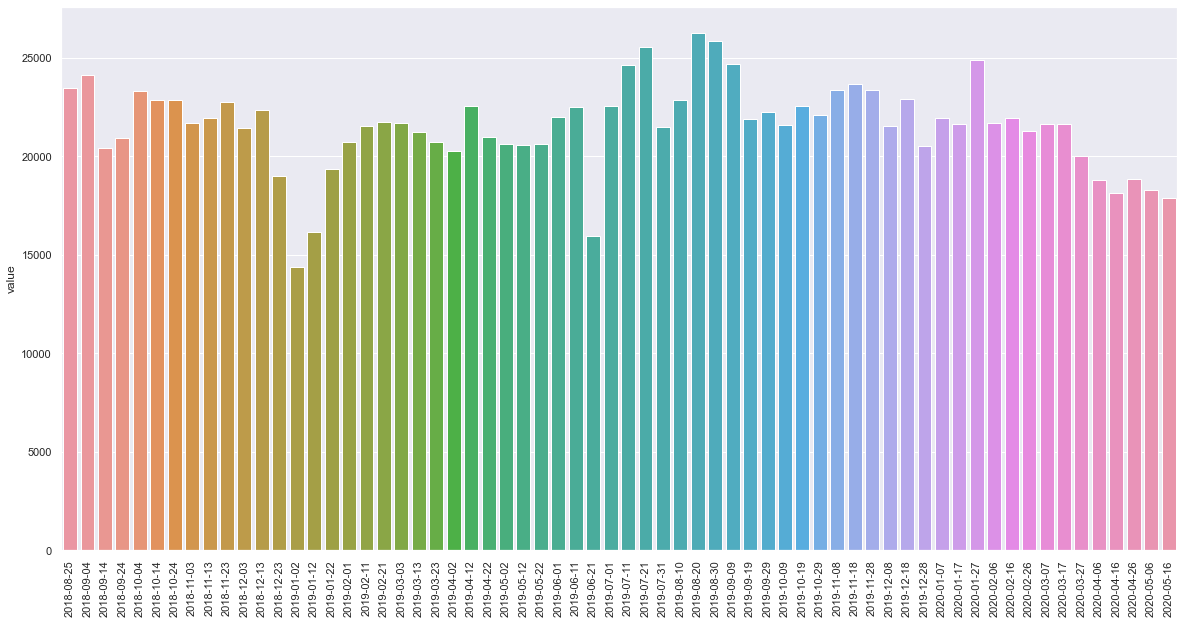

In [44]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(calories.bins.unique(), calories.groupby('bins').sum()['value'], ax=ax)